<h1>Model_Selection_Training_Cluster_2_0</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

C:\Users\Dinesh\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Data/Cluster_data.csv")

In [3]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Cluster,Label
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.500000,126.0,2.140000,110.000000,2,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,103.0,1.966667,108.666667,0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.633333,110.0,1.910000,121.000000,2,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.900000,176.0,2.003333,177.666667,2,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.200000,62.0,1.870000,71.000000,0,1.0


In [4]:
list_of_clusters = df["Cluster"].unique()

In [5]:
list_of_clusters

array([2, 0, 1], dtype=int64)

<h1>Cluster 2</h1>

In [6]:
cluster_data_2 = df[df["Cluster"] == list_of_clusters[0]]

In [7]:
cluster_data_2.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Cluster,Label
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.500000,126.0,2.140000,110.000000,2,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.633333,110.0,1.910000,121.000000,2,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.900000,176.0,2.003333,177.666667,2,1.0
5,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.500000,184.0,2.300000,142.000000,2,1.0
8,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.200000,124.0,1.930000,133.000000,2,1.0


In [8]:
cluster_feature_2 = cluster_data_2.drop(["Cluster", "Label"], axis = 1)
cluster_label_2 = cluster_data_2["Label"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(cluster_feature_2, cluster_label_2, test_size=.3, random_state=355)

<h1>Random Forest</h1>

In [10]:
clf = RandomForestClassifier()

In [11]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
clf.score(x_test, y_test)

0.9928774928774928

In [13]:
clf.score(x_train, y_train)

1.0

In [14]:
param_clf = {"n_estimators": [10, 50, 100, 130, 160, 200, 250], 
             "criterion": ['gini', 'entropy'],
            "max_depth": range(2, 8, 1), 
             "max_features": ['sqrt', 'log2']
}

In [17]:
grid = GridSearchCV(estimator=clf, param_grid=param_clf, cv=10, n_jobs=-1, error_score="raise")

In [23]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 130, 160, 200, 250]})

In [24]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [15]:
clf = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt', n_estimators=100)

In [16]:
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7)

In [17]:
clf.score(x_test, y_test)

0.886039886039886

In [18]:
clf.score(x_train, y_train)

0.9016493585827734

In [19]:
prediction_clf = clf.predict_proba(x_test)
if len(y_test.unique()) == 1:
    clf_score_2 = accuracy_score(y_test, prediction_clf)
else:
    clf_score_2 = roc_auc_score(y_test, prediction_clf, multi_class="ovr")
clf_score_2

0.9848749197961503

<h1>KNN</h1>

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
knn.score(x_test, y_test)

0.9301994301994302

In [23]:
knn.score(x_train, y_train)

0.9578497251069029

In [48]:
param_knn = {
    'n_neighbors' : [i for i in range(5, 25)],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [8,9,11,12,21,24,23,45,67,78,],
    'p' : [1,2],
    'weights' : ['uniform','distance']
}

In [49]:
grid = GridSearchCV(estimator=knn, param_grid=param_knn, cv=10, n_jobs=-1, error_score="raise")

In [50]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=KNeighborsClassifier(leaf_size=10, weights='distance'),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [8, 9, 11, 12, 21, 24, 23, 45, 67, 78],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [51]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 8,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [24]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=8, n_neighbors=5,p=2,weights='distance')

In [25]:
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=8, weights='distance')

In [26]:
knn.score(x_test, y_test)

0.9387464387464387

In [27]:
knn.score(x_train,y_train)

1.0

In [28]:
prediction_score = knn.predict_proba(x_test)
if len(y_test.unique()) == 1:
    knn_score_2 = accuracy_score(y_test, prediction_score)
else:
    knn_score_2 = roc_auc_score(y_test, prediction_score, multi_class="ovr")

<h1>SVM</h1>

In [29]:
svm = SVC()

In [30]:
svm.fit(x_train, y_train)

SVC()

In [31]:
svm.score(x_test, y_test)

0.6723646723646723

In [32]:
svm.score(x_train,y_train)

0.6945632254123396

In [70]:
param_svm = {
    'kernel' :['linear', 'poly', 'rbf', 'sigmoid']
}

In [71]:
grid = GridSearchCV(estimator=svm, param_grid=param_svm, cv=10, n_jobs=3, error_score="raise")

In [72]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=SVC(), n_jobs=3,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [73]:
grid.best_params_

{'kernel': 'linear'}

In [33]:
svm = SVC(kernel='linear')

In [34]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [35]:
svm.score(x_test, y_test)

0.7165242165242165

In [36]:
svm.score(x_train, y_train)

0.7532070861331704

In [37]:
prediction_svm_2 = svm.score(x_test,y_test)

<h1>Decision Tree</h1>

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
dt.score(x_test, y_test)

0.9672364672364673

In [41]:
dt.score(x_train, y_train)

1.0

In [87]:
parm_dt = {"criterion" : ['gini', 'entropy'],
             "splitter" : ['best', 'random'],
             "max_depth" : range(2, 40, 1),
             "min_samples_split" : range(2, 10, 1),
             "min_samples_leaf" : range(1, 10, 1)}

In [94]:
grid = GridSearchCV(estimator=dt, param_grid=parm_dt, cv=10, n_jobs=3, error_score="raise")

In [95]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [96]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 35,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [42]:
dt = DecisionTreeClassifier(criterion='gini', max_depth= 35, min_samples_leaf= 1,min_samples_split= 2, splitter= 'random')

In [43]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=35, splitter='random')

In [44]:
dt.score(x_test, y_test)

0.9786324786324786

In [45]:
dt.score(x_train, y_train)

1.0

In [46]:
prediction_dt = dt.predict_proba(x_test)
dt_score_2 = roc_auc_score(y_test, prediction_dt, multi_class='ovr')

<h1>Cluster 0</h1>

In [47]:
cluster_data_0 = df[df["Cluster"] == list_of_clusters[1]]

In [48]:
cluster_data_0.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Cluster,Label
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.000000,103.0,1.966667,108.666667,0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.200000,62.0,1.870000,71.000000,0,1.0
6,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.966667,73.0,1.920000,79.000000,0,1.0
7,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.600000,81.0,1.700000,116.000000,0,1.0
9,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.600000,84.0,1.890000,94.000000,0,1.0


In [49]:
cluster_features_0 = cluster_data_0.drop(columns = ['Cluster','Label'],axis=1)

In [50]:
cluster_label_0 = cluster_data_0['Label']

In [51]:
x_train, x_test, y_train,y_test = train_test_split(cluster_features_0, cluster_label_0, test_size = .3, random_state= 355)

<h1>Random Forest</h1>

In [52]:
clf_0 = RandomForestClassifier()

In [53]:
clf_0.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
clf_0.score(x_test, y_test)

0.9922644163150492

In [55]:
clf_0.score(x_train, y_train)

1.0

In [56]:
param_clf_0 = {"n_estimators" : [10, 20, 67, 240, 110, 100, 250],
               "criterion" : ['gini', 'entropy'],
               "max_depth" : range(2,8,1),
               "max_features" : ['sqrt', 'log2']  
}

In [120]:
grid = GridSearchCV(estimator =clf_0, param_grid = param_clf_0,cv= 10, n_jobs=-1, error_score = "raise" )

In [121]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 67, 240, 110, 100, 250]})

In [122]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 250}

In [57]:
clf_0 = RandomForestClassifier(criterion= 'gini', max_depth= 7,max_features= 'log2', n_estimators= 250)

In [58]:
clf_0.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=250)

In [59]:
clf_0.score(x_test, y_test)

0.8291139240506329

In [60]:
clf_0.score(x_train, y_train)

0.8395173453996984

In [61]:
prediction_clf = clf_0.predict_proba(x_test)
if len(y_test.unique()) == 1:
    clf_score_0 = accuracy_score(y_test, prediction_clf)
else:
    clf_score_0 = roc_auc_score(y_test, prediction_clf, multi_class="ovr")
clf_score_0

0.934690768293213

<h1>KNN</h1>

In [62]:
knn_0 = KNeighborsClassifier()

In [63]:
knn_0.fit(x_train, y_train)

KNeighborsClassifier()

In [64]:
knn_0.score(x_test, y_test)

0.9205344585091421

In [65]:
knn_0.score(x_train, y_train)

0.9282051282051282

In [132]:
param_knn_0 = {'n_neighbors' : [i for i in range(5, 25)],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [8,9,11,12,21,50,20,60,70,100],
    'p' : [1,2],
    'weights' : ['uniform','distance']
    
}

In [133]:
grid = GridSearchCV(estimator = knn_0, param_grid = param_knn_0, cv= 10, n_jobs =-1, error_score = "raise")

In [137]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [8, 9, 11, 12, 21, 50, 20, 60, 70, 100],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [138]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 8,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [66]:
knn_0 = KNeighborsClassifier(algorithm= 'auto', leaf_size= 8, n_neighbors= 5, p= 1, weights= 'distance')

In [67]:
knn_0.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=8, p=1, weights='distance')

In [68]:
knn_0.score(x_test, y_test)

0.9240506329113924

In [69]:
knn_0.score(x_train, y_train)

1.0

In [70]:
prediction_score = knn_0.predict_proba(x_test)
if len(y_test.unique()) == 1:
    knn_score_0 = accuracy_score(y_test, prediction_score)
else:
    knn_score_0 = roc_auc_score(y_test, prediction_score, multi_class="ovr")

<h1>SVM</h1>

In [71]:
svm_0 = SVC()

In [72]:
svm_0.fit(x_train, y_train)

SVC()

In [73]:
svm_0.score(x_test, y_test)

0.6315049226441631

In [74]:
svm_0.score(x_train, y_train)

0.6132730015082957

In [148]:
param_svm_0 = {
    'kernel' :['linear', 'poly', 'rbf', 'sigmoid']
}

In [149]:
grid = GridSearchCV(estimator = svm_0, param_grid = param_svm_0, cv= 10, n_jobs = -1, error_score= "raise")

In [150]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [151]:
grid.best_params_

{'kernel': 'linear'}

In [75]:
svm_0 = SVC(kernel= 'linear')

In [76]:
svm_0.fit(x_train, y_train)

SVC(kernel='linear')

In [77]:
svm_0.score(x_test, y_test)

0.6870604781997187

In [78]:
svm_0.score(x_train, y_train)

0.6911010558069381

In [79]:
prediction_svm_0 = svm_0.score(x_test,y_test)

<h1>Decision Tree</h1>

In [80]:
dt_0 = DecisionTreeClassifier()

In [81]:
dt_0.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
dt_0.score(x_test, y_test)

0.9683544303797469

In [83]:
dt_0.score(x_train, y_train)

1.0

In [163]:
param_dt_0 = { "criterion" : ['gini', 'entropy'],
             "splitter" : ['best', 'random'],
             "max_depth" : range(2, 40, 1),
             "min_samples_split" : range(2, 10, 1),
             "min_samples_leaf" : range(1, 10, 1)
    
}

In [164]:
grid = GridSearchCV(estimator = dt_0, param_grid = param_dt_0, cv= 10, n_jobs= -1, error_score = "raise")

In [165]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [166]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 39,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [84]:
dt_0 = DecisionTreeClassifier(criterion= 'gini', max_depth= 39, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')

In [85]:
dt_0.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=39, splitter='random')

In [86]:
dt_0.score(x_test, y_test)

0.9669479606188467

In [87]:
dt_0.score(x_train,y_train)

1.0

In [88]:
prediction_dt = dt_0.predict_proba(x_test)
dt_score_0 = roc_auc_score(y_test, prediction_dt, multi_class='ovr')

<h1>Model Accuracy</h1>

<h3>Cluster number 2</h3>

In [89]:
import matplotlib.pyplot as plt

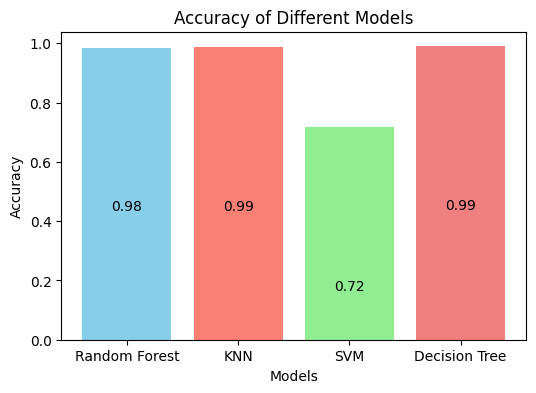

In [90]:
models = ['Random Forest', 'KNN', 'SVM', 'Decision Tree']

accuracies = [clf_score_2, knn_score_2, prediction_svm_2, dt_score_2]
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']


plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.55, f'{acc:.2f}', ha='center', color='black', fontsize=10)
plt.show()

<h3>As Decision Tree has the highest accuracy score we will consider DT as our Model for cluster number 2</h3>

In [91]:
with open("dt.pkl", 'wb') as f:
    pickle.dump(dt,f)

<h3>Cluster number 0</h3>

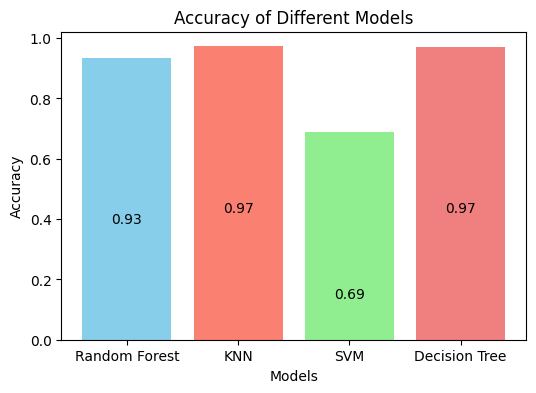

In [92]:
models = ['Random Forest', 'KNN', 'SVM', 'Decision Tree']

accuracies = [clf_score_0, knn_score_0, prediction_svm_0, dt_score_0]
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']


plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.55, f'{acc:.2f}', ha='center', color='black', fontsize=10)
plt.show()

<h3>As we have chosen KNN and DT for other two clusters so we will be considering Random Forest for cluster number 0</h3>

In [94]:
with open("clf.pkl", 'wb') as f:
    pickle.dump(clf_0,f)